In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from decimal import Decimal
import matplotlib
from matplotlib.ticker import MultipleLocator
matplotlib.rc('xtick', labelsize=11) 
matplotlib.rc('ytick', labelsize=11) 

In [2]:
test_sizes = [24,30,36,42,48,54,60]
non_locality = [1,2,3,4]
all_data = {}
z2 = len(non_locality)
z = len(test_sizes)
ehxcmae = np.zeros((z2,z))
vhxcmae_c = np.zeros((z2,z))

emae = np.zeros((z2,z))
ehxcksmae = np.zeros((z2,z))
vhxcksmae_c = np.zeros((z2,z))
dmae_c = np.zeros((z2,z))

vhxcmae = np.zeros((3,60))
dmae = np.zeros((3,60))
vhxcksmae = np.zeros((3,60))

In [3]:
for j, L in enumerate(test_sizes):
    with open('data/exact_data/L'+str(L)+'_num1000.pkl', 'rb') as f:
                data = pickle.load(f)
    all_data['exact_L'+str(L)] = data
    for i, a in enumerate(non_locality):
        with open('data/test_b_data/L'+str(L)+'_num1000_ks_a'+str(a)+'.pkl', 'rb') as f:
                data = pickle.load(f)
        all_data['ks_L'+str(L)+'_a'+str(a)] = data
        with open('data/test_a_data/L'+str(L)+'_num1000_a'+str(a)+'.pkl', 'rb') as f:
                data = pickle.load(f)
        all_data['ml_L'+str(L)+'_a'+str(a)] = data
        ehxcmae[i,j] = np.mean(np.abs(all_data['ml_L'+str(L)+'_a'+str(a)]['e_hxc'] - all_data['exact_L'+str(L)]['e_hxc']))/L
        emae[i,j] = np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['e_ks'] - all_data['exact_L'+str(L)]['e_mb']))/L
        ehxcksmae[i,j] = np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['e_hxc'] - all_data['exact_L'+str(L)]['e_hxc']))/L
        vhxcksmae_c[i,j] = (np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['v_hxc'][:,L//2 -1]-all_data['exact_L'+str(L)]['v_hxc'][:,L//2 -1])) + np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['v_hxc'][:,L//2]-all_data['exact_L'+str(L)]['v_hxc'][:,L//2])))/2
        dmae_c[i,j] = (np.mean(np.abs(2*all_data['ks_L'+str(L)+'_a'+str(a)]['n'][:,L//2 -1]-(all_data['exact_L'+str(L)]['n_up'][:,L//2 -1]+all_data['exact_L'+str(L)]['n_dn'][:,L//2 -1]))) + np.mean(np.abs(2*all_data['ks_L'+str(L)+'_a'+str(a)]['n'][:,L//2]-(all_data['exact_L'+str(L)]['n_up'][:,L//2]+all_data['exact_L'+str(L)]['n_dn'][:,L//2 ]))))/2
        vhxcmae_c[i,j] = (np.mean(np.abs(all_data['ml_L'+str(L)+'_a'+str(a)]['v_hxc'][:,L//2 -1]-all_data['exact_L'+str(L)]['v_hxc'][:,L//2 -1])) + np.mean(np.abs(all_data['ml_L'+str(L)+'_a'+str(a)]['v_hxc'][:,L//2]-all_data['exact_L'+str(L)]['v_hxc'][:,L//2])))/2
        if a ==4:
            if L == 36:
                vhxcmae[0, 12:48] = np.mean(np.abs(all_data['ml_L'+str(L)+'_a'+str(a)]['v_hxc']-all_data['exact_L'+str(L)]['v_hxc']), axis = 0)
                dmae[0, 12:48] = np.mean(np.abs(2*all_data['ks_L'+str(L)+'_a'+str(a)]['n']-(all_data['exact_L'+str(L)]['n_up']+all_data['exact_L'+str(L)]['n_dn'])),axis=0)
                vhxcksmae[0, 12:48] = np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['v_hxc']-all_data['exact_L'+str(L)]['v_hxc']), axis=0)
            elif L == 48:
                vhxcmae[1, 6:54] = np.mean(np.abs(all_data['ml_L'+str(L)+'_a'+str(a)]['v_hxc']-all_data['exact_L'+str(L)]['v_hxc']), axis = 0)
                dmae[1, 6:54] = np.mean(np.abs(2*all_data['ks_L'+str(L)+'_a'+str(a)]['n']-(all_data['exact_L'+str(L)]['n_up']+all_data['exact_L'+str(L)]['n_dn'])),axis=0)
                vhxcksmae[1, 6:54] = np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['v_hxc']-all_data['exact_L'+str(L)]['v_hxc']), axis=0)
            elif L == 60:
                vhxcmae[2] = np.mean(np.abs(all_data['ml_L'+str(L)+'_a'+str(a)]['v_hxc']-all_data['exact_L'+str(L)]['v_hxc']), axis = 0)
                dmae[2] = np.mean(np.abs(2*all_data['ks_L'+str(L)+'_a'+str(a)]['n']-(all_data['exact_L'+str(L)]['n_up']+all_data['exact_L'+str(L)]['n_dn'])),axis=0)
                vhxcksmae[2] = np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['v_hxc']-all_data['exact_L'+str(L)]['v_hxc']), axis=0)

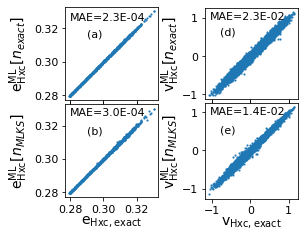

In [4]:
def fig_2_a_b_d_e(v_hxc_exact,v_hxc_ml,v_hxc_ml_ks,e_hxc_exact,e_hxc_ml,e_hxc_ml_ks, figsize):
    ps = 2.5
    fs = 11
    fs2 = 14
    vmlr = v_hxc_ml-v_hxc_exact
    vksr = v_hxc_ml_ks - v_hxc_exact
    excr = e_hxc_ml-e_hxc_ml_ks
    excksr = e_hxc_ml_ks - e_hxc_exact
    excr_mae = '%.1E' % Decimal(str(np.mean(np.abs(excr))))
    excksr_mae = '%.1E' % Decimal(str(np.mean(np.abs(excksr))))
    vmlr_mae = '%.1E' % Decimal(str(np.mean(np.abs(vmlr))))
    vksr_mae = '%.1E' % Decimal(str(np.mean(np.abs(vksr))))
    f, ((a0,a1),(a2,a3)) = plt.subplots(2,2, gridspec_kw ={'height_ratios': [1,1], 'width_ratios':[1,1]}, sharex = False, sharey =False, figsize = (4.5*figsize, 3.5*figsize))
    f.subplots_adjust(left=0.19, bottom=0.135, right=0.99, top=0.99, hspace=0.01, wspace=0.5)
    a0.plot(e_hxc_exact,e_hxc_ml,'s', markersize = 1)
    a0.text(np.min(e_hxc_exact),0.325, 'MAE='+excr_mae, fontsize = fs)
    a0.text(0.29, 0.315, '(a)', fontsize = fs)
    #a0.grid()
    a0.set_aspect('equal', adjustable='box');a1.set_aspect('equal', adjustable='box');a2.set_aspect('equal', adjustable='box');a3.set_aspect('equal', adjustable='box')
    a0.set_ylabel(r'$\mathrm{e^{ML}_{Hxc}}[n_{exact}]$', fontsize = fs2)
    a0.set_xticks(np.array([0.28,0.3,0.32]), fontsize=fs)
    #a0.xaxis.set_label_position('top') system
    a0.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = True, labelleft = True)
    a1.plot(v_hxc_exact,v_hxc_ml,'s', markersize = 1)
    a1.text(np.min(v_hxc_exact),0.95, 'MAE='+vmlr_mae, fontsize = fs)
    a1.text(-0.8,0.55, '(d)', fontsize = fs)
    #a1.grid() 
    a1.set_ylabel(r'$\mathrm{v_{Hxc}^{ML}}[n_{exact}]$', fontsize = fs2, labelpad=0.0) 
    a1.set_yticks(np.array([-1,0,1]), fontsize=fs)
    #a1.set_ylabel(r'$\mathrm{E^{ML}_{Hxc}}$', fontsize = fs)
    a1.tick_params(axis = 'both', labelsize = fs, right = False, labelright = False, left = True, labelleft = True, bottom = True, labelbottom = False, top = False, labeltop = False)
    a2.plot(e_hxc_exact, e_hxc_ml_ks,'s', markersize = 1)
    a2.set_xlabel(r'$\mathrm{e_{Hxc,exact}}$', fontsize = fs2, labelpad = 0) 
    a2.text(np.min(e_hxc_exact),0.326, 'MAE='+excksr_mae, fontsize = fs)
    a2.text(0.29, 0.315, '(b)', fontsize = fs)
    a2.set_ylabel(r'$\mathrm{e_{Hxc}^{ML}}[n_{MLKS}]$', fontsize = fs2)
    a2.set_xticks(np.array([0.28,0.3,0.32]), fontsize = fs)
    #a2.grid()
    a2.tick_params(axis = 'both', labelsize = fs, top = True, labeltop=False, bottom = True, labelbottom=True, left = True, labelleft = True)
    a3.plot(v_hxc_exact, v_hxc_ml_ks,'s', markersize = 1)
    a3.text(np.min(v_hxc_exact),0.95, 'MAE='+vksr_mae, fontsize = fs)
    a3.text(-0.8,0.45, '(e)', fontsize = fs)
    a3.set_ylabel(r'$\mathrm{v_{Hxc}^{ML}}[n_{MLKS}]$', fontsize = fs2, labelpad = 0) 
    a3.set_xlabel(r'$\mathrm{v_{Hxc,exact}}$', fontsize = fs2, labelpad = 0)
    #a3.grid()
    a3.tick_params(axis = 'both', labelsize = fs, top = True, labeltop=False, bottom = True, labelbottom=True, left = True, labelleft = True)
    #plt.savefig('mltest1_.png', dpi = 600)
fig_2_a_b_d_e(np.concatenate(all_data['exact_L60']['v_hxc']), np.concatenate(all_data['ml_L60_a4']['v_hxc']),np.concatenate(all_data['ks_L60_a4']['v_hxc']), all_data['exact_L60']['e_hxc']/60, all_data['ml_L60_a4']['e_hxc']/60, all_data['ks_L60_a4']['e_hxc']/60,0.9)

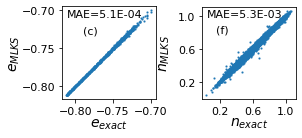

In [5]:
def fig_2_c_f(n,nks,emb,eks, figsize):
    ps = 2.5
    fs = 11
    fs2 = 14
    bins = 20
    er = emb-eks
    nr =nks-n
    er_mae = '%.1E' % Decimal(str(np.mean(np.abs(er))))
    nr_mae = '%.1E' % Decimal(str(np.mean(np.abs(nr))))
    f, ((a4,a5)) = plt.subplots(1,2, gridspec_kw ={'height_ratios': [1], 'width_ratios':[1,1]}, sharex = False, sharey =False, figsize = (4.5*figsize, 2.1*figsize))
    f.subplots_adjust(left=0.19, bottom=0.143, right=0.99, top=0.99, hspace=0.01, wspace=0.5)
    a4.set_aspect('equal', adjustable='box');a5.set_aspect('equal', adjustable='box')
    a4.plot(emb, eks,'s', markersize = 1)
    a4.text(np.min(emb),-0.708, 'MAE='+er_mae, fontsize = fs) 
    a4.text(-0.79,-0.73,'(c)', fontsize=fs)
    #a4.grid()
    a4.tick_params(axis = 'both', labelsize = fs, right = False, labelright = False, left = True, labelleft = True, bottom = True, top = False, labeltop = False, labelbottom = True)
    a4.set_ylabel(r'$e_{MLKS}$', fontsize = fs2, labelpad=0)
    a4.set_xlabel(r'$e_{exact}$', fontsize = fs2, labelpad=0)
    a4.set_xticks(np.array([-0.8, -0.75,-0.7]))
    #a4.set_yticks(np.array([-0.8, -0.75,-0.7]), fontsize=fs)
    a5.plot(n, nks,'s', markersize = 1)
    a5.text(np.min(n),2*0.493, 'MAE='+nr_mae, fontsize = fs) 
    a5.text(0.15,0.8, '(f)', fontsize = fs)
    #a5.grid()
    a5.set_yticks(np.array([0.2,0.6,1.0]))
    a5.set_xticks(np.array([0.2,0.6,1.0]))
    #a5.yaxis.set_label_position("right")
    a5.tick_params(axis = 'both', labelsize = fs, right = False, labelright = False, left = True, labelleft = True, bottom = True, top = False, labeltop = False, labelbottom = True)
    a5.set_ylabel(r'$n_{MLKS}$', fontsize = fs2, labelpad=6)
    a5.set_xlabel(r'$n_{exact}$', fontsize = fs2, labelpad=0)
    plt.savefig('mltest2__.png', dpi = 600)
fig_2_c_f((np.concatenate(all_data['exact_L60']['n_up']+all_data['exact_L60']['n_dn'])), 2*np.concatenate(all_data['ks_L60_a4']['n']), all_data['exact_L60']['e_mb']/60, all_data['ks_L60_a4']['e_ks']/60, 0.9)

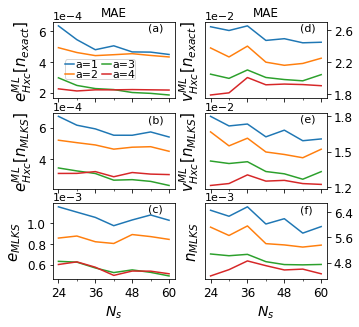

In [6]:
def fig_3(sizes, excmae, excksmae, mae_c, vxcksmae_c, dmae_c, emae, figsize):
    fs = 12;fs2= 15;fs3 = 11
    f, ((a0,a1),(a2,a3),(a4,a5)) = plt.subplots(3,2, gridspec_kw ={'height_ratios': [11,11,11], 'width_ratios':[16,16]}, sharex = 'col', sharey =False, figsize = (16*2.3*figsize, 11*3*figsize))
    f.subplots_adjust(left=0.13, bottom=0.118, right=0.925, top=0.95, hspace=0.19, wspace=0.25)
    a0.ticklabel_format(axis='y', style='scientific',scilimits=(0,0));a2.ticklabel_format(axis='y', style='sci',scilimits=(0,0));a4.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
    a1.ticklabel_format(axis='y', style='scientific',scilimits=(0,0));a3.ticklabel_format(axis='y', style='sci',scilimits=(0,0));a5.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
    a0.set_title('MAE', fontsize=fs)
    a1.set_title('MAE', fontsize=fs)
    a0.set_ylabel(r'$e^{ML}_{Hxc}[n_{exact}]$', fontsize = fs2)
    a2.set_ylabel(r'$e^{ML}_{Hxc}[n_{MLKS}]$', fontsize = fs2)
    a4.set_ylabel(r'$e_{MLKS}$', fontsize = fs2)
    a1.set_ylabel(r'$v^{ML}_{Hxc}[n_{exact}]$', fontsize=fs2, labelpad=4)
    a3.set_ylabel(r'$v^{ML}_{Hxc}[n_{MLKS}]$', fontsize=fs2, labelpad=4)
    a5.set_ylabel(r'$n_{MLKS}$', fontsize=fs2, labelpad=4)
    a0.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = True, labelleft = True)
    a2.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = True, labelleft = True)
    a4.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=True, left = True, labelleft = True)
    a1.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = False, labelleft = False, right = True, labelright=True)
    a3.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = False, labelleft = False, right = True, labelright=True)
    a5.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=True, left = False, labelleft = False, right = True, labelright=True)
    #a0.grid(which='both');a1.grid(which='both');a2.grid(which='both');a3.grid(which='both');a4.grid(which='both');a5.grid(which='both')
    a4.xaxis.set_major_locator(MultipleLocator(12))
    a4.xaxis.set_major_formatter('{x:.0f}')
    a4.xaxis.set_minor_locator(MultipleLocator(6))
    a4.set_xticks(np.array([24,36,48,60]))
    a5.xaxis.set_major_locator(MultipleLocator(12))
    a5.xaxis.set_major_formatter('{x:.0f}')
    a5.xaxis.set_minor_locator(MultipleLocator(6))
    a5.set_xticks(np.array([24,36,48,60]))
    a4.set_xlabel(r'$N_s$', fontsize = 14)
    a5.set_xlabel(r'$N_s$', fontsize = 14)
    a0.set_yticks(np.array([2E-4,4E-4,6E-4]))
    a2.set_yticks(np.array([2E-4,4E-4,6E-4]))
    a4.set_yticks(np.array([6E-4,8E-4,10E-4]))
    a3.set_yticks(np.array([1.2E-2, 1.5E-2, 1.8E-2]))
    a1.set_yticks(np.array([1.8E-2, 2.2E-2, 2.6E-2]))
    a5.set_yticks(np.array([4.8E-3,5.6E-3,6.4E-3]))
    a0.text(53,6E-4,'(a)', fontsize=fs3)
    a1.text(53,2.59E-2,'(d)', fontsize=fs3)
    a2.text(53,6.3E-4,'(b)', fontsize=fs3)
    a3.text(53,1.75E-2,'(e)', fontsize=fs3)
    a4.text(53,1.108E-3,'(c)', fontsize=fs3)
    a5.text(53,6.38E-3,'(f)', fontsize=fs3)
    for i in [0,1,2,3]:
        a0.plot(sizes, excmae[i], label= 'a='+str(non_locality[i]))
        a1.plot(sizes,mae_c[i],'-', label= 'a='+str(non_locality[i]))
        a2.plot(sizes,excksmae[i], '-')
        a3.plot(sizes,vxcksmae_c[i], '-')
        a4.plot(sizes,emae[i], '-')
        a5.plot(sizes,dmae_c[i], '-')
    a0.legend(loc = (0.1,0.25),fontsize = fs3, borderpad = 0.0,labelspacing=0.0, handlelength=0.8, ncol=2, columnspacing =0.4, handletextpad=0.1)

fig_3(test_sizes, ehxcmae, ehxcksmae, vhxcmae_c, vhxcksmae_c, dmae_c, emae, 0.13)

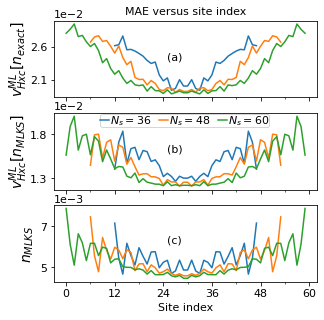

In [7]:
vhxcmae_s = (vhxcmae + np.flip(vhxcmae, axis = 1))/2
dmae_s = (dmae + np.flip(dmae, axis = 1))/2
vhxcksmae_s = (vhxcksmae + np.flip(vhxcksmae, axis = 1))/2
def fig_4(vmaes,_,xcmaes,figsize):
    fs=11
    fs2 = 14
    f, ((a1),(a3),(a5)) = plt.subplots(3,1, gridspec_kw ={'height_ratios': [9,9,9], 'width_ratios':[27]}, sharex = 'col', sharey =False, figsize = (27*figsize, 3*9*figsize))
    f.subplots_adjust(left=0.14, bottom=0.11, right=0.985, top=0.95, hspace=0.2, wspace=0.04)
    sites = np.array([i+1 for i in range(48)])
    a1.set_title('MAE versus site index', fontsize = fs)
    a1.ticklabel_format(axis='y', style='scientific',scilimits=(0,0));a3.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
    a5.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
    sites = np.array([i for i in range(60)])
    sizes3 = np.array([36,48,60])
    for i in range(3):
        size = sizes3[i]
        offset = (60-size)//2
        a1.plot(sites[offset:offset+size], vmaes[i,offset:offset+size], '-', label = r'$N_s$='+str(size))
        a3.plot(sites[offset:offset+size], xcmaes[i,offset:offset+size], '-', label = r'$N_s=$'+str(size))
        a5.plot(sites[offset:offset+size], _[i,offset:offset+size], '-', label = r'$N_s=$'+str(size))
    a3.legend(loc = (0.135*1.3,0.81),fontsize = fs, borderpad = 0.0,labelspacing=0.0, handlelength=0.8, ncol=3, columnspacing =0.7,handletextpad=0.1)
    #a1.tick_params(axis = 'both', labelsize = fs, right = True, labelright = True, left = False, labelleft = False, bottom = True, labelbottom = False, top = False, labeltop = False)
    #a1.grid(which='both');a3.grid(which='both');a5.grid(which='both')
    a5.set_xlabel('Site index', fontsize = fs)
    a5.set_ylabel(r'$n_{MLKS}$', fontsize = fs2)
  #a3.legend(fontsize = 10, borderpad = 0.1,labelspacing=0.1, handlelength=1, ncol=3, columnspacing =1, loc = 8)
    a5.set_xlabel('Site index', fontsize = fs)
    a1.text(25,2.4E-2,'(a)', fontsize=fs)
    a3.text(25,1.6E-2, '(b)', fontsize=fs)
    a5.text(25,6.2E-3, '(c)', fontsize = fs)
    a1.set_yticks(np.array([2.1E-2,2.6E-2]))
    a3.set_yticks(np.array([1.3E-2,1.8E-2]))
    a5.set_yticks(np.array([5E-3,7E-3]))
    a1.set_ylabel(r'$v_{Hxc}^{ML} [n_{exact}]$', fontsize = fs2, labelpad=0)
    a3.set_ylabel(r'$v_{Hxc}^{ML} [n_{MLKS}]$', fontsize = fs2, labelpad=0)
    a5.xaxis.set_major_locator(MultipleLocator(12))
    a5.xaxis.set_major_formatter('{x:.0f}')
    a5.xaxis.set_minor_locator(MultipleLocator(6))
    #plt.savefig('boundaries4_a4sym.png', dpi = 600)

fig_4(vhxcmae_s,dmae_s,vhxcksmae_s,0.16)